# Project Description - Automatic Defects Classification for Steel Defects in Manufacturing

**Introduction** <br>
This is a project of defects classification for steel defects on the GC10-DET surface dataset using transfer learning, which the model is pre-trained on ImageNet dataset. A few models such as VGG16, Xception, InceptionResNetV2 and ResNet152V2 will be used for training the dataset and provide comparison between them. 

**Outline** <br>
This project will have the presentation outlined as follows,
1. Dataset visualization
2. Model training and validation
3. Model testing
4. Results evaluation
5. Model prediction
6. Conclusion and acknowledgements

In [1]:
# Import necessary libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import random
from matplotlib.patches import Rectangle
from lxml import etree

# Enable Matplotlib backend for displaying static images
%matplotlib inline

In [2]:
# Subfolders for the class labels

import os
os.listdir("/kaggle/input/defects-class-and-location/images/images")

['inclusion',
 'waist folding',
 'rolled_pit',
 'oil_spot',
 'crescent_gap',
 'crease',
 'water_spot',
 'punching_hole',
 'silk_spot',
 'welding_line']

In [3]:
# Annotations of the class labels

os.listdir("/kaggle/input/defects-class-and-location/label/label")

['img_01_425241700_00384.xml',
 'img_06_425505000_00050.xml',
 'img_06_3436814300_00056.xml',
 'img_07_425390900_00077.xml',
 'img_01_425005700_00501.xml',
 'img_07_4406743300_00036.xml',
 'img_08_436164500_01565.xml',
 'img_02_425501900_00018.xml',
 'img_01_425503500_00017.xml',
 'img_03_3403331900_01545.xml',
 'img_05_436164700_01553.xml',
 'img_08_424826800_00002.xml',
 'img_07_3436814000_00691.xml',
 'img_03_436164700_00257.xml',
 'img_07_425507200_00974.xml',
 'img_08_4402851700_00985.xml',
 'img_03_425501800_01214.xml',
 'img_02_436153600_00700.xml',
 'img_02_3436813700_00274.xml',
 'img_03_436184600_00786.xml',
 'img_03_425620300_00001.xml',
 'img_01_425005700_00181.xml',
 'img_03_425503000_00017.xml',
 'img_07_4405133600_00042.xml',
 'img_05_4406743300_00482.xml',
 'img_07_3436786500_00002.xml',
 'img_03_425644600_00004.xml',
 'img_08_3437011100_00686.xml',
 'img_02_4406446600_00072.xml',
 'img_08_424799300_01132.xml',
 'img_03_425640100_00875.xml',
 'img_07_3436814000_00694.xm

In [4]:
# Read all the images and count the number of image paths in the training subfolders

image_path = glob.glob("/kaggle/input/defects-class-and-location/images/images/*/*.jpg")
len(image_path)

2306

In [5]:
# Read all the annotation files and count the number of annotations in the training label folder

xmls_path = glob.glob("/kaggle/input/defects-class-and-location/label/label/*.xml")
len(xmls_path)

2280

In [6]:
# Sort the annotation and image files in ascending order

xmls_path.sort(key = lambda x:x.split("/")[-1].split(".xml")[0])
image_path.sort(key = lambda x:x.split("/")[-1].split(".jpg")[0])

In [7]:
# Extract the annotation filename without file extension

xmls_train = [path.split("/")[-1].split(".")[0] for path in xmls_path]
xmls_train[:5]

['img_01_3402617700_00001',
 'img_01_3402617700_01009',
 'img_01_3436789500_00004',
 'img_01_3436814600_00259',
 'img_01_3436815300_00473']

In [8]:
# Retrieve the image filename to match the annotation file counts
# Ensure unique counts of training images with the annotations

imgs_train = [img for img in image_path if (img.split("/")[-1].split)(".jpg")[0] in xmls_train]
imgs_train[:5]

['/kaggle/input/defects-class-and-location/images/images/crescent_gap/img_01_3402617700_00001.jpg',
 '/kaggle/input/defects-class-and-location/images/images/crescent_gap/img_01_3402617700_01009.jpg',
 '/kaggle/input/defects-class-and-location/images/images/crease/img_01_3436789500_00004.jpg',
 '/kaggle/input/defects-class-and-location/images/images/silk_spot/img_01_3436814600_00259.jpg',
 '/kaggle/input/defects-class-and-location/images/images/silk_spot/img_01_3436815300_00473.jpg']

In [9]:
len(imgs_train),len(xmls_path)

(2280, 2280)

In [10]:
# Extract label names as DataFrame column

labels = [label.split("/")[-2] for label in imgs_train]
labels[:5]

['crescent_gap', 'crescent_gap', 'crease', 'silk_spot', 'silk_spot']

In [11]:
labels = pd.DataFrame(labels, columns = ["Defect Type"])
labels

,Defect Type
0,crescent_gap
1,crescent_gap
2,crease
3,silk_spot
4,silk_spot
...,...
2275,silk_spot
2276,silk_spot
2277,silk_spot
2278,silk_spot


In [12]:
# One-hot encoding for multiple classes
from sklearn.preprocessing import LabelBinarizer

# Obtain training labels without duplication
Class = labels["Defect Type"].unique()
# Store data values in key:value pairs with Python dictionaries
Class_dict = dict(zip(Class, range(1,len(Class) + 1)))
labels["Class"] = labels["Defect Type"].apply(lambda x: Class_dict[x])

lb = LabelBinarizer()
# Fit label binarizer
lb.fit(list(Class_dict.values()))
# Convert multi-class labels to binary labels (belong or does not belong to the class)
transformed_labels = lb.transform(labels["Class"])
y_bin_labels = []  

for i in range(transformed_labels.shape[1]):
    y_bin_labels.append("Class" + str(i))
    labels["Class" + str(i + 1)] = transformed_labels[:, i]

In [13]:
Class_dict

{'crescent_gap': 1,
 'crease': 2,
 'silk_spot': 3,
 'water_spot': 4,
 'welding_line': 5,
 'inclusion': 6,
 'oil_spot': 7,
 'waist folding': 8,
 'rolled_pit': 9,
 'punching_hole': 10}

In [14]:
labels.drop("Class", axis = 1, inplace = True)
labels.drop("Defect Type", axis = 1, inplace = True)
labels.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [15]:
# Function to parse and extract information from annotation files

def to_labels(path):
    # Read the annotation file
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    # Obtain the image width
    width = int(sel.xpath("//size/width/text()")[0])
    # Obtain the image height
    height = int(sel.xpath("//size/height/text()")[0])  
    # Extract the bounding box coordinates
    xmin = int(sel.xpath("//bndbox/xmin/text()")[0])
    xmax = int(sel.xpath("//bndbox/xmax/text()")[0])
    ymin = int(sel.xpath("//bndbox/ymin/text()")[0])
    ymax = int(sel.xpath("//bndbox/ymax/text()")[0])
    # Return the relative coordinates
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [16]:
# Display the relative bounding box coordinates

coors = [to_labels(path) for path in xmls_path]
coors[:5]

[[0.8486328125, 0.806, 0.951171875, 0.993],
 [0.857421875, 0.298, 0.96044921875, 0.858],
 [0.47900390625, 0.182, 0.9990234375, 0.249],
 [0.3642578125, 0.017, 0.49365234375, 0.993],
 [0.3974609375, 0.017, 0.7431640625, 0.978]]

In [17]:
# Set four coordinate points as outputs

xmin, ymin, xmax, ymax = list(zip(*coors))

# Convert to Numpy array
xmin = np.array(xmin)
ymin = np.array(ymin)
xmax = np.array(xmax)
ymax = np.array(ymax)
label = np.array(labels.values)

In [18]:
# Creates a Dataset whose elements are slices of the given tensors
# Slicing a 1D tensor produces scalar tensor elements

labels_dataset = tf.data.Dataset.from_tensor_slices((xmin, ymin, xmax, ymax, label))
labels_dataset

<TensorSliceDataset shapes: ((), (), (), (), (10,)), types: (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64)>

In [19]:
# Load the image from image path

def load_image(path):
    image = tf.io.read_file(path)                           
    image = tf.image.decode_jpeg(image,3)               
    image = tf.image.resize(image,[224,224])               
    image = tf.cast(image,tf.float32)  
    image = image / 255
    return image

In [20]:
# Build the dataset

dataset = tf.data.Dataset.from_tensor_slices(imgs_train)
dataset = dataset.map(load_image)

dataset_label = tf.data.Dataset.zip((dataset, labels_dataset))
dataset_label

<ZipDataset shapes: ((224, 224, 3), ((), (), (), (), (10,))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64))>

In [21]:
# Shuffle the images and extract the images by the defined batch size

batch_size = 32
dataset_label = dataset_label.repeat().shuffle(500).batch(batch_size)

# Creates a Dataset that prefetches elements from this dataset
# Most dataset input pipelines should end with a call to prefetch
# This allows later elements to be prepared while the current element is being processed
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements

dataset_label = dataset_label.prefetch(tf.data.experimental.AUTOTUNE)

In [22]:
# Split the dataset into 80% for training and 20% for testing

train_count = int(len(imgs_train) * 0.8)
test_count = int(len(imgs_train) * 0.2)
train_count, test_count

(1824, 456)

In [23]:
train_dataset = dataset_label.skip(test_count)
test_dataset = dataset_label.take(test_count)

In [24]:
class_dict = {v:k for k,v in Class_dict.items()}
class_dict

{1: 'crescent_gap',
 2: 'crease',
 3: 'silk_spot',
 4: 'water_spot',
 5: 'welding_line',
 6: 'inclusion',
 7: 'oil_spot',
 8: 'waist folding',
 9: 'rolled_pit',
 10: 'punching_hole'}

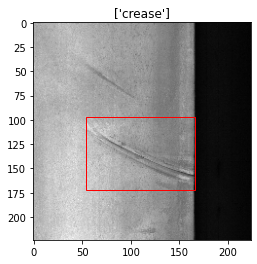

In [25]:
# Display a sample training image with its label

for img, label in train_dataset.take(1):
    plt.imshow(keras.preprocessing.image.array_to_img(img[0]))     
    out1, out2, out3, out4, out5 = label                            
    xmin, ymin, xmax, ymax = out1[0].numpy()*224, out2[0].numpy()*224, out3[0].numpy()*224, out4[0].numpy()*224
    rect = Rectangle((xmin,ymin),(xmax - xmin),(ymax - ymin), fill = False, color = "r")  
    ax = plt.gca()                      
    ax.axes.add_patch(rect)   
    pred_imglist = []
    pred_imglist.append(class_dict[np.argmax(out5[0])+1])
    plt.title(pred_imglist)
    plt.show()

**i. VGG16**

In [26]:
# Import VGG16 model with pre-trained weights from ImageNet

base_vgg16 = tf.keras.applications.VGG16(weights = "imagenet",
                                         include_top = False,
                                         input_shape = (224,224,3),
                                         pooling = 'avg')

58892288/58889256 [==============================] - 0s 0us/step


In [27]:
# Train the base model with fully-connected layers

base_vgg16.trainable = True

In [28]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_vgg16(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024,activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512,activation = "relu")(x2)
out_class = keras.layers.Dense(10,activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

vgg16 = keras.models.Model(inputs = inputs, outputs = out)
vgg16.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 512)          14714688    input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1024)         525312      vgg16[0][0]                      
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         525312      vgg16[0][0]                      
______________________________________________________________________________________________

In [29]:
# Compile the model with optimizer and loss functions

vgg16.compile(keras.optimizers.Adam(0.0005),
              loss = {"xmin": "mse",
                      "ymin": "mse",
                      "xmax": "mse",
                      "ymax": "mse",
                      "class": "categorical_crossentropy"},
              metrics = ["mae","acc"])

In [30]:
# Reduce learning rate

lr_reduce = keras.callbacks.ReduceLROnPlateau("val_loss", patience = 5, factor = 0.5, min_lr = 1e-6)

In [31]:
# Start training the model

history = vgg16.fit(train_dataset,
                    steps_per_epoch = train_count//batch_size,
                    epochs = 200,
                    validation_data = test_dataset,
                    validation_steps = test_count//batch_size,
                    callbacks = [lr_reduce])

Epoch 1/200
57/57 [==============================] - 173s 533ms/step - loss: 2.9768 - xmin_loss: 0.2335 - ymin_loss: 0.2145 - xmax_loss: 0.1570 - ymax_loss: 0.1649 - class_loss: 2.2070 - xmin_mae: 0.3785 - xmin_acc: 0.0000e+00 - ymin_mae: 0.3054 - ymin_acc: 0.0000e+00 - xmax_mae: 0.3163 - xmax_acc: 0.0815 - ymax_mae: 0.3317 - ymax_acc: 0.0534 - class_mae: 0.1721 - class_acc: 0.2201 - val_loss: 2.1953 - val_xmin_loss: 0.0655 - val_ymin_loss: 0.0841 - val_xmax_loss: 0.0704 - val_ymax_loss: 0.1160 - val_class_loss: 1.8592 - val_xmin_mae: 0.2056 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.2318 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.2180 - val_xmax_acc: 0.1094 - val_ymax_mae: 0.3071 - val_ymax_acc: 0.1027 - val_class_mae: 0.1609 - val_class_acc: 0.3438
Epoch 2/200
57/57 [==============================] - 29s 513ms/step - loss: 2.4889 - xmin_loss: 0.0915 - ymin_loss: 0.0806 - xmax_loss: 0.1002 - ymax_loss: 0.1050 - class_loss: 2.1117 - xmin_mae: 0.2601 - xmin_acc: 0.0000e+00 - ymin_ma

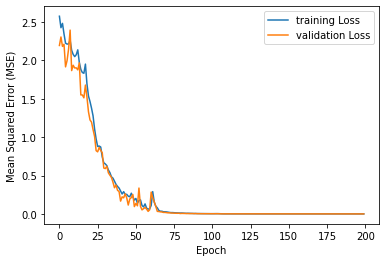

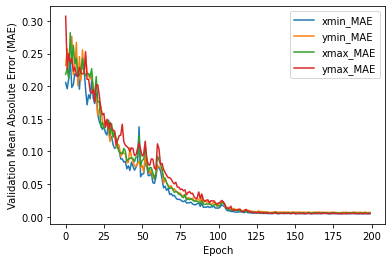

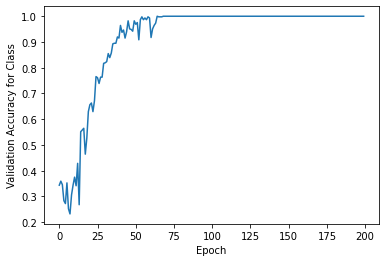

In [32]:
# Visualize the results after training

def plot_history(history):                
    hist = pd.DataFrame(history.history)           
    hist["epoch"] = history.epoch
    
    plt.figure()                                     
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")               
    plt.plot(hist["epoch"], hist["loss"], label = "training Loss")
    plt.plot(hist["epoch"], hist["val_loss"], label = "validation Loss")                           
    plt.legend()
    
    plt.figure()                                      
    plt.xlabel("Epoch")
    plt.ylabel("Validation Mean Absolute Error (MAE)")               
    plt.plot(hist["epoch"], hist["val_xmin_mae"], label = "xmin_MAE")
    plt.plot(hist["epoch"], hist["val_ymin_mae"], label = "ymin_MAE")
    plt.plot(hist["epoch"], hist["val_xmax_mae"], label = "xmax_MAE")
    plt.plot(hist["epoch"], hist["val_ymax_mae"], label = "ymax_MAE")
    plt.legend()      
    
    plt.figure()                                      
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy for Class")               
    plt.plot(hist["epoch"],hist["val_class_acc"], label = "class_accuracy")
    
    plt.show()
    
plot_history(history)  

In [33]:
results = vgg16.evaluate(test_dataset)

456/456 [==============================] - 147s 313ms/step - loss: 5.6748e-04 - xmin_loss: 4.9899e-05 - ymin_loss: 1.9198e-04 - xmax_loss: 6.3699e-05 - ymax_loss: 2.5248e-04 - class_loss: 9.4165e-06 - xmin_mae: 0.0041 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0063 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0044 - xmax_acc: 0.0912 - ymax_mae: 0.0056 - ymax_acc: 0.0779 - class_mae: 1.8829e-06 - class_acc: 1.0000


In [34]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.004089734051376581
MAE of ymin value in test set:0.006321065593510866
MAE of xmax value in test set:0.004430329892784357
MAE of ymax value in test set:0.0056288959458470345
Testing accuracy of predicted label:1.0


In [35]:
vgg16.save("vgg16.h5")

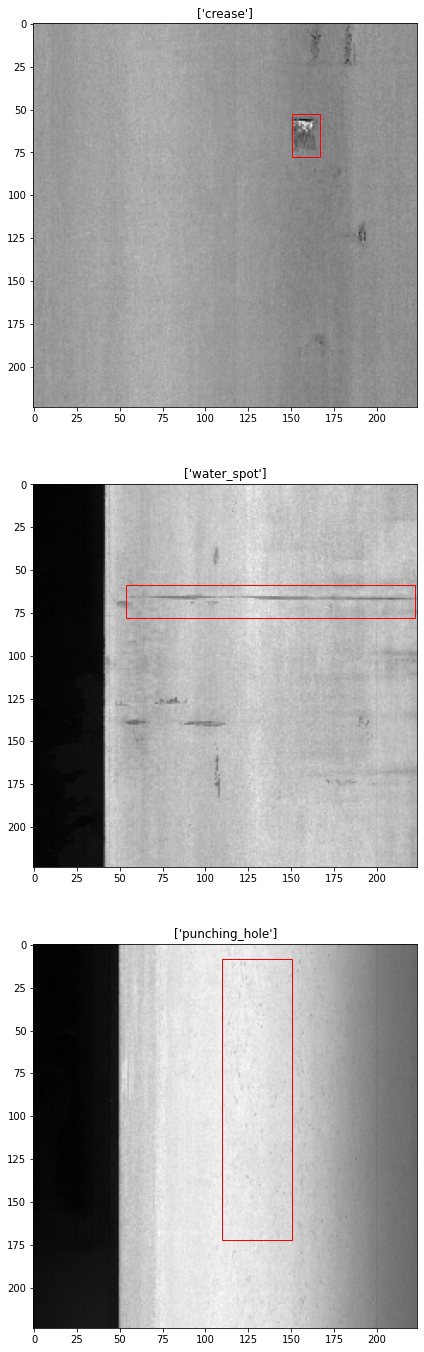

In [36]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = vgg16.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [37]:
# Append all the true labels into a list

true_labels = []

for _, label in test_dataset:    
    out1, out2, out3, out4, out5 = label                              
    true_labels.append(class_dict[np.argmax(out5) + 1])

In [38]:
true_labels

['water_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'inclusion',
 'welding_line',
 'welding_line',
 'water_spot',
 'crescent_gap',
 'punching_hole',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'rolled_pit',
 'punching_hole',
 'oil_spot',
 'welding_line',
 'water_spot',
 'rolled_pit',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'oil_spot',
 'water_spot',
 'crescent_gap',
 'waist folding',
 'silk_spot',
 'punching_hole',
 'oil_spot',
 'waist folding',
 'waist folding',
 'welding_line',
 'oil_spot',
 'silk_spot',
 'waist folding',
 'silk_spot',
 'crescent_gap',
 'welding_line',
 'oil_spot',
 'silk_spot',
 'punching_hole',
 'waist folding',
 'waist folding',
 'welding_line',
 'waist folding',
 'crescent_gap',
 'silk_spot',
 'welding_line',
 'welding_line',
 'waist folding',
 'crescent_gap',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'welding_line',
 '

In [39]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = vgg16.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [40]:
test_labels

['water_spot',
 'inclusion',
 'silk_spot',
 'water_spot',
 'crescent_gap',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'waist folding',
 'silk_spot',
 'crease',
 'silk_spot',
 'inclusion',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'inclusion',
 'waist folding',
 'silk_spot',
 'crescent_gap',
 'crescent_gap',
 'water_spot',
 'inclusion',
 'silk_spot',
 'punching_hole',
 'crescent_gap',
 'welding_line',
 'inclusion',
 'welding_line',
 'water_spot',
 'water_spot',
 'water_spot',
 'inclusion',
 'waist folding',
 'water_spot',
 'waist folding',
 'oil_spot',
 'punching_hole',
 'silk_spot',
 'waist folding',
 'silk_spot',
 'oil_spot',
 'welding_line',
 'punching_hole',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'waist folding',
 'crescent_gap',
 'silk_spot',
 'punching_hole',
 'waist folding',
 'silk_spot',
 'waist folding',
 'water_spot',
 'welding_line',
 'waist folding'

In [41]:
target_names = ['cresent_gap', 'crease', 'silk_spot', 'water_spot', 'welding_line', 
                'inclusion', 'oil_spot', 'waist_folding', 'rolled_pit', 'punching_hole']

In [42]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.00      0.00      0.00         9
       crease       0.14      0.18      0.16        39
    silk_spot       0.07      0.06      0.06        51
   water_spot       0.10      0.09      0.10        33
 welding_line       0.05      0.06      0.05        36
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.32      0.38      0.35       133
waist_folding       0.10      0.08      0.09        37
   rolled_pit       0.12      0.10      0.11        60
punching_hole       0.09      0.08      0.08        52

     accuracy                           0.17       456
    macro avg       0.10      0.10      0.10       456
 weighted avg       0.16      0.17      0.16       456



In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  1,  0,  1,  0,  0,  3],
       [ 0,  3, 50, 21, 12, 10,  8,  0,  0,  8],
       [ 0,  0, 20,  6,  5,  9,  3,  0,  3,  6],
       [ 0,  1, 16,  3,  4, 10,  4,  0,  0,  2],
       [ 0,  2, 17,  4,  7,  3,  5,  0,  0,  4],
       [ 0,  1,  9,  3,  2,  3,  3,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 14,  3,  6,  3,  3,  0,  0,  2]])

**ii. Xception**

In [44]:
# Import Xception model with pre-trained weights from ImageNet

base_xception = tf.keras.applications.Xception(weights = "imagenet",
                                               include_top = False,
                                               input_shape = (224,224,3),
                                               pooling = 'avg')

83689472/83683744 [==============================] - 0s 0us/step


In [45]:
# Train the base model with fully-connected layers

base_xception.trainable = True

In [46]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_xception(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024, activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512, activation = "relu")(x2)
out_class = keras.layers.Dense(10, activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

xception = keras.models.Model(inputs = inputs, outputs = out)
xception.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, 2048)         20861480    input_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 1024)         2098176     xception[0][0]                   
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1024)         2098176     xception[0][0]                   
____________________________________________________________________________________________

In [47]:
# Compile the model with optimizer and loss functions

xception.compile(keras.optimizers.Adam(0.0005),
                 loss = {"xmin": "mse",
                         "ymin": "mse",
                         "xmax": "mse",
                         "ymax": "mse",
                         "class": "categorical_crossentropy"},
                 metrics = ["mae","acc"])

In [48]:
# Start training the model

history = xception.fit(train_dataset,
                       steps_per_epoch = train_count//batch_size,
                       epochs = 200,
                       validation_data = test_dataset,
                       validation_steps = test_count//batch_size,
                       callbacks = [lr_reduce])

Epoch 1/200
57/57 [==============================] - 171s 617ms/step - loss: 2.1751 - xmin_loss: 0.1080 - ymin_loss: 0.1132 - xmax_loss: 0.1751 - ymax_loss: 0.2034 - class_loss: 1.5753 - xmin_mae: 0.2577 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2389 - ymin_acc: 0.0000e+00 - xmax_mae: 0.3206 - xmax_acc: 0.0525 - ymax_mae: 0.3417 - ymax_acc: 0.0471 - class_mae: 0.1312 - class_acc: 0.4556 - val_loss: 2.7648 - val_xmin_loss: 0.6188 - val_ymin_loss: 0.0414 - val_xmax_loss: 0.4023 - val_ymax_loss: 0.3283 - val_class_loss: 1.3741 - val_xmin_mae: 0.7167 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.1664 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.5418 - val_xmax_acc: 0.1027 - val_ymax_mae: 0.5148 - val_ymax_acc: 0.0960 - val_class_mae: 0.0900 - val_class_acc: 0.5804
Epoch 2/200
57/57 [==============================] - 32s 561ms/step - loss: 0.9187 - xmin_loss: 0.0491 - ymin_loss: 0.0410 - xmax_loss: 0.0609 - ymax_loss: 0.0619 - class_loss: 0.7058 - xmin_mae: 0.1646 - xmin_acc: 0.0000e+00 - ymin_ma

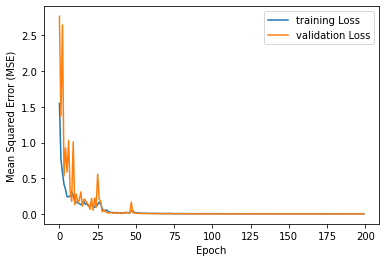

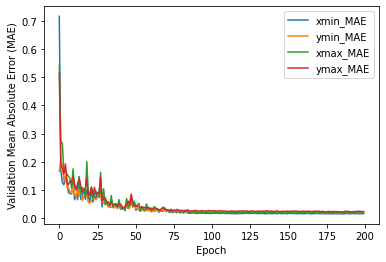

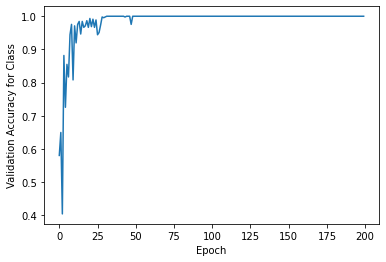

In [49]:
plot_history(history)  

In [50]:
results = xception.evaluate(test_dataset)

456/456 [==============================] - 148s 314ms/step - loss: 0.0028 - xmin_loss: 5.0153e-04 - ymin_loss: 7.4025e-04 - xmax_loss: 6.0630e-04 - ymax_loss: 9.8713e-04 - class_loss: 1.9617e-06 - xmin_mae: 0.0162 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0188 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0180 - xmax_acc: 0.0920 - ymax_mae: 0.0212 - ymax_acc: 0.0772 - class_mae: 3.9433e-07 - class_acc: 1.0000


In [51]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.0162131879478693
MAE of ymin value in test set:0.01878337562084198
MAE of xmax value in test set:0.01801149733364582
MAE of ymax value in test set:0.021169360727071762
Testing accuracy of predicted label:1.0


In [52]:
xception.save("xception.h5")

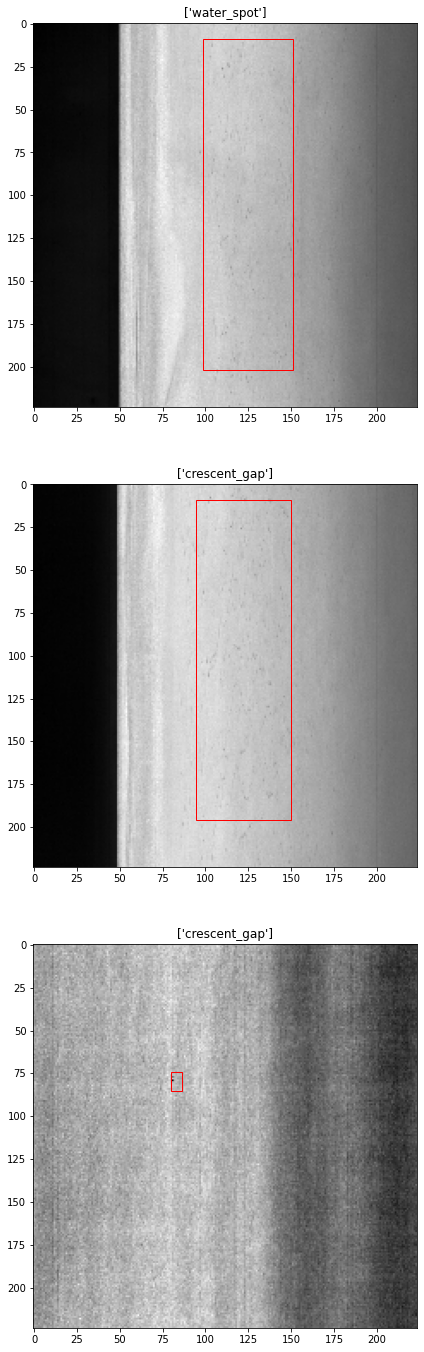

In [53]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = xception.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [54]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = xception.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [55]:
test_labels

['crease',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'water_spot',
 'welding_line',
 'inclusion',
 'welding_line',
 'inclusion',
 'water_spot',
 'crescent_gap',
 'oil_spot',
 'welding_line',
 'welding_line',
 'water_spot',
 'water_spot',
 'silk_spot',
 'inclusion',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'punching_hole',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'inclusion',
 'silk_spot',
 'punching_hole',
 'punching_hole',
 'inclusion',
 'crescent_gap',
 'punching_hole',
 'waist folding',
 'crease',
 'inclusion',
 'water_spot',
 'waist folding',
 'silk_spot',
 'waist folding',
 'crescent_gap',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'crease',
 'crescent_gap',
 'inclusion',
 'silk_spot',
 'punching_hole',
 'inclusion',
 'silk_spot',
 'welding_line',
 'inclusion',
 'silk_spot',
 'crescent_gap',
 'water_spot',
 'inclusion',
 

In [56]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.00      0.00      0.00         9
       crease       0.05      0.05      0.05        39
    silk_spot       0.14      0.14      0.14        51
   water_spot       0.08      0.09      0.08        33
 welding_line       0.05      0.06      0.05        36
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.28      0.28      0.28       133
waist_folding       0.19      0.14      0.16        37
   rolled_pit       0.14      0.12      0.13        60
punching_hole       0.18      0.23      0.20        52

     accuracy                           0.16       456
    macro avg       0.11      0.11      0.11       456
 weighted avg       0.17      0.16      0.16       456



In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  1,  0,  1,  0,  0,  0,  1],
       [ 0,  4, 37, 19, 20, 17,  9,  0,  0,  7],
       [ 0,  2, 18,  7, 10,  5,  4,  0,  2,  6],
       [ 0,  0, 11,  4, 12,  7,  9,  0,  0,  2],
       [ 0,  1, 12,  5, 10,  7,  4,  0,  0,  6],
       [ 0,  1, 10,  4,  2,  3,  3,  0,  1,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  2,  0,  0,  0,  0,  2],
       [ 0,  2,  9,  5,  3,  3,  5,  0,  0,  2]])

**iii. InceptionResNetV2**

In [58]:
# Import InceptionResNetV2 model with pre-trained weights from ImageNet

base_inceptionresnetv2 = tf.keras.applications.InceptionResNetV2(weights = "imagenet",
                                                                 include_top = False,
                                                                 input_shape = (224,224,3),
                                                                 pooling = 'avg')

219062272/219055592 [==============================] - 2s 0us/step


In [59]:
# Train the base model with fully-connected layers

base_inceptionresnetv2.trainable = True

In [60]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_inceptionresnetv2(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024, activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512, activation = "relu")(x2)
out_class = keras.layers.Dense(10, activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

inceptionresnetv2 = keras.models.Model(inputs = inputs, outputs = out)
inceptionresnetv2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
inception_resnet_v2 (Functional (None, 1536)         54336736    input_6[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 1024)         1573888     inception_resnet_v2[0][0]        
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1024)         1573888     inception_resnet_v2[0][0]        
____________________________________________________________________________________________

In [61]:
# Compile the model with optimizer and loss functions

inceptionresnetv2.compile(keras.optimizers.Adam(0.0005),
                          loss = {"xmin": "mse",
                                  "ymin": "mse",
                                  "xmax": "mse",
                                  "ymax": "mse",
                                  "class": "categorical_crossentropy"},
                          metrics = ["mae","acc"])

In [62]:
# Start training the model

history = inceptionresnetv2.fit(train_dataset,
                                steps_per_epoch = train_count//batch_size,
                                epochs = 200,
                                validation_data = test_dataset,
                                validation_steps = test_count//batch_size,
                                callbacks = [lr_reduce])

Epoch 1/200
57/57 [==============================] - 189s 691ms/step - loss: 2.5144 - xmin_loss: 0.1114 - ymin_loss: 0.1450 - xmax_loss: 0.1478 - ymax_loss: 0.3157 - class_loss: 1.7944 - xmin_mae: 0.2692 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2755 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2934 - xmax_acc: 0.0702 - ymax_mae: 0.4013 - ymax_acc: 0.0470 - class_mae: 0.1470 - class_acc: 0.3760 - val_loss: 4.1725 - val_xmin_loss: 0.1741 - val_ymin_loss: 0.0884 - val_xmax_loss: 0.1315 - val_ymax_loss: 0.0981 - val_class_loss: 3.6804 - val_xmin_mae: 0.3227 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.2676 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.3146 - val_xmax_acc: 0.0134 - val_ymax_mae: 0.2620 - val_ymax_acc: 0.0982 - val_class_mae: 0.1770 - val_class_acc: 0.0915
Epoch 2/200
57/57 [==============================] - 31s 554ms/step - loss: 0.9781 - xmin_loss: 0.0563 - ymin_loss: 0.0403 - xmax_loss: 0.0619 - ymax_loss: 0.0480 - class_loss: 0.7716 - xmin_mae: 0.1858 - xmin_acc: 0.0000e+00 - ymin_ma

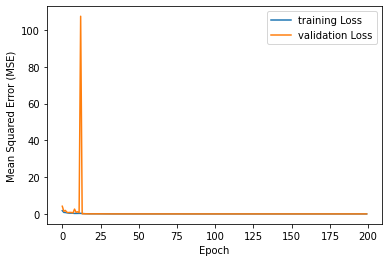

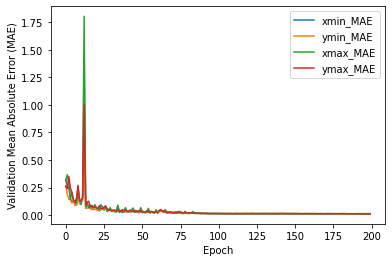

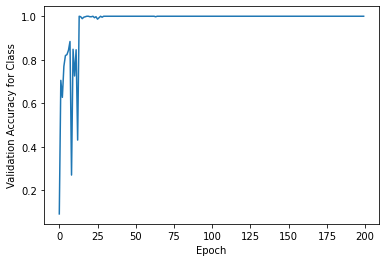

In [63]:
plot_history(history) 

In [64]:
results = inceptionresnetv2.evaluate(test_dataset)

456/456 [==============================] - 155s 330ms/step - loss: 0.0012 - xmin_loss: 2.6243e-04 - ymin_loss: 3.2270e-04 - xmax_loss: 2.9396e-04 - ymax_loss: 2.8248e-04 - class_loss: 4.7769e-06 - xmin_mae: 0.0124 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0135 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0132 - xmax_acc: 0.0916 - ymax_mae: 0.0128 - ymax_acc: 0.0776 - class_mae: 9.5685e-07 - class_acc: 1.0000


In [65]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.01241189893335104
MAE of ymin value in test set:0.01348261907696724
MAE of xmax value in test set:0.013245206326246262
MAE of ymax value in test set:0.012782320380210876
Testing accuracy of predicted label:1.0


In [66]:
inceptionresnetv2.save("inceptionresnetv2.h5")

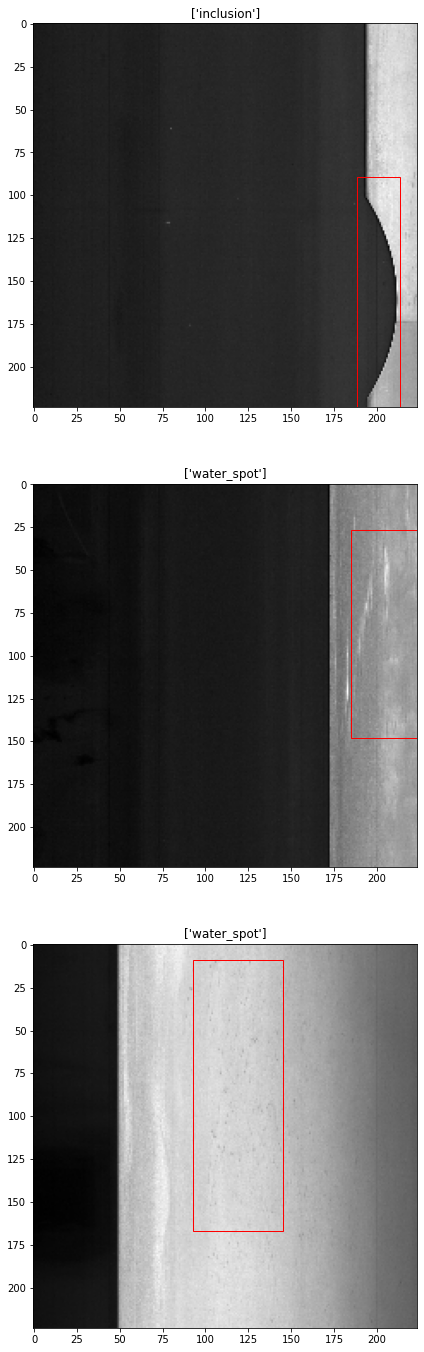

In [67]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = inceptionresnetv2.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [68]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = inceptionresnetv2.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [69]:
test_labels

['crescent_gap',
 'welding_line',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'crescent_gap',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'welding_line',
 'inclusion',
 'silk_spot',
 'crescent_gap',
 'water_spot',
 'water_spot',
 'punching_hole',
 'punching_hole',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'punching_hole',
 'crease',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'water_spot',
 'crease',
 'inclusion',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'water_spot',
 'punching_hole',
 'welding_line',
 'punching_hole',
 'welding_line',
 'waist folding',
 'inclusion',
 'water_spot',
 'oil_spot',
 'waist folding',
 'punching_hole',
 'silk_spot',
 'inclusion',
 'oil_spot',
 'punching_hole',
 'silk_spot',
 'welding_line',
 'water_spot',
 'silk_spot',
 'inclusion',
 'silk_spot',
 'punching_hole',
 'waist folding',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'silk_spot',
 

In [70]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.00      0.00      0.00         9
       crease       0.09      0.10      0.09        39
    silk_spot       0.08      0.06      0.07        51
   water_spot       0.07      0.09      0.08        33
 welding_line       0.12      0.14      0.13        36
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.26      0.26      0.26       133
waist_folding       0.12      0.08      0.10        37
   rolled_pit       0.09      0.10      0.10        60
punching_hole       0.08      0.08      0.08        52

     accuracy                           0.14       456
    macro avg       0.09      0.09      0.09       456
 weighted avg       0.14      0.14      0.14       456



In [71]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  1,  1,  1,  1,  0,  0,  1],
       [ 0,  1, 34, 22, 13,  8, 14,  0,  0, 12],
       [ 0,  2, 22,  6,  9,  3,  8,  0,  1,  4],
       [ 0,  4, 11,  8,  4, 10,  3,  0,  0,  4],
       [ 0,  1, 19,  9,  3,  3,  4,  0,  2,  3],
       [ 0,  1,  7,  7,  5,  4,  3,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0, 11,  5,  4,  5,  2,  0,  1,  5]])

**iv. ResNet152V2**

In [72]:
# Import InceptionResNetV2 model with pre-trained weights from ImageNet

base_resnet152v2 = tf.keras.applications.ResNet152V2(weights = "imagenet",
                                                     include_top = False,
                                                     input_shape = (224,224,3),
                                                     pooling = 'avg')

234553344/234545216 [==============================] - 3s 0us/step


In [73]:
# Train the base model with fully-connected layers

base_resnet152v2.trainable = True

In [74]:
# Define the base model with fully-connected layers
inputs = keras.Input(shape = (224,224,3))
x = base_resnet152v2(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024, activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512, activation = "relu")(x2)
out_class = keras.layers.Dense(10, activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

resnet152v2 = keras.models.Model(inputs = inputs, outputs = out)
resnet152v2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
resnet152v2 (Functional)        (None, 2048)         58331648    input_8[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 1024)         2098176     resnet152v2[0][0]                
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 1024)         2098176     resnet152v2[0][0]                
____________________________________________________________________________________________

In [75]:
# Compile the model with optimizer and loss functions

resnet152v2.compile(keras.optimizers.Adam(0.0005),
                    loss = {"xmin": "mse",
                            "ymin": "mse",
                            "xmax": "mse",
                            "ymax": "mse",
                            "class": "categorical_crossentropy"},
                    metrics = ["mae","acc"])

In [76]:
# Start training the model

history = resnet152v2.fit(train_dataset,
                          steps_per_epoch = train_count//batch_size,
                          epochs = 200,
                          validation_data = test_dataset,
                          validation_steps = test_count//batch_size,
                          callbacks = [lr_reduce])

Epoch 1/200
57/57 [==============================] - 190s 739ms/step - loss: 2.7639 - xmin_loss: 0.1025 - ymin_loss: 0.2539 - xmax_loss: 0.1032 - ymax_loss: 0.5772 - class_loss: 1.7271 - xmin_mae: 0.2545 - xmin_acc: 0.0000e+00 - ymin_mae: 0.3326 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2498 - xmax_acc: 0.0667 - ymax_mae: 0.5080 - ymax_acc: 0.0419 - class_mae: 0.1423 - class_acc: 0.3999 - val_loss: 2.7973 - val_xmin_loss: 0.1886 - val_ymin_loss: 0.1634 - val_xmax_loss: 0.1243 - val_ymax_loss: 0.2929 - val_class_loss: 2.0280 - val_xmin_mae: 0.3177 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.3557 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.2529 - val_xmax_acc: 0.1362 - val_ymax_mae: 0.4409 - val_ymax_acc: 0.1116 - val_class_mae: 0.1497 - val_class_acc: 0.2344
Epoch 2/200
57/57 [==============================] - 33s 581ms/step - loss: 1.1755 - xmin_loss: 0.0505 - ymin_loss: 0.0448 - xmax_loss: 0.0590 - ymax_loss: 0.0682 - class_loss: 0.9529 - xmin_mae: 0.1694 - xmin_acc: 0.0000e+00 - ymin_ma

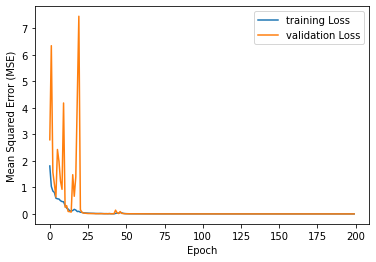

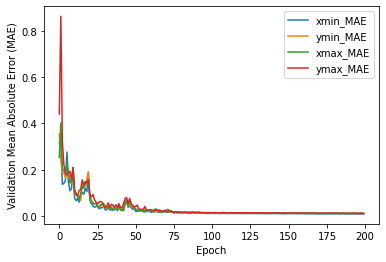

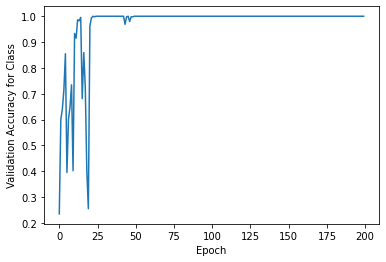

In [77]:
plot_history(history)

In [78]:
results = resnet152v2.evaluate(test_dataset)

456/456 [==============================] - 153s 326ms/step - loss: 7.6033e-04 - xmin_loss: 1.6290e-04 - ymin_loss: 1.8479e-04 - xmax_loss: 1.8278e-04 - ymax_loss: 2.2483e-04 - class_loss: 5.0224e-06 - xmin_mae: 0.0097 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0100 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0102 - xmax_acc: 0.0920 - ymax_mae: 0.0112 - ymax_acc: 0.0782 - class_mae: 1.0061e-06 - class_acc: 1.0000


In [79]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.00966434832662344
MAE of ymin value in test set:0.010045130737125874
MAE of xmax value in test set:0.010168730281293392
MAE of ymax value in test set:0.011241774074733257
Testing accuracy of predicted label:1.0


In [80]:
resnet152v2.save("resnet152v2.h5")

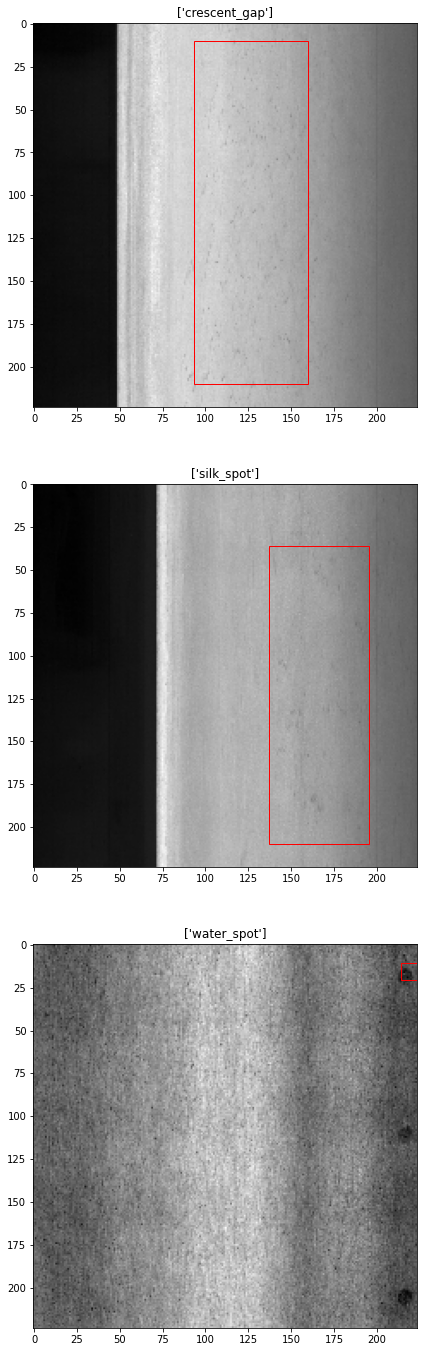

In [81]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = resnet152v2.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [82]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = resnet152v2.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [83]:
test_labels

['welding_line',
 'water_spot',
 'water_spot',
 'crescent_gap',
 'silk_spot',
 'water_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'welding_line',
 'silk_spot',
 'water_spot',
 'water_spot',
 'inclusion',
 'water_spot',
 'silk_spot',
 'rolled_pit',
 'oil_spot',
 'punching_hole',
 'welding_line',
 'silk_spot',
 'inclusion',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'silk_spot',
 'punching_hole',
 'inclusion',
 'silk_spot',
 'punching_hole',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'welding_line',
 'punching_hole',
 'welding_line',
 'inclusion',
 'waist folding',
 'silk_spot',
 'punching_hole',
 'welding_line',
 'silk_spot',
 'water_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'oil_spot',
 'oil_spot',
 'oil_spot',
 'silk_spot',
 'welding_line',
 'crescent_gap',
 'silk_spot',
 'welding_line',
 'oil_spot',
 'inclusion',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'water_spot',
 'silk_spot'

In [84]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, test_labels, target_names = target_names))

               precision    recall  f1-score   support

  cresent_gap       0.09      0.11      0.10         9
       crease       0.12      0.15      0.14        39
    silk_spot       0.07      0.06      0.06        51
   water_spot       0.07      0.09      0.08        33
 welding_line       0.09      0.11      0.10        36
    inclusion       0.00      0.00      0.00         6
     oil_spot       0.29      0.29      0.29       133
waist_folding       0.29      0.16      0.21        37
   rolled_pit       0.12      0.10      0.11        60
punching_hole       0.09      0.12      0.10        52

     accuracy                           0.16       456
    macro avg       0.12      0.12      0.12       456
 weighted avg       0.17      0.16      0.16       456



In [85]:
from sklearn.metrics import confusion_matrix

confusion_matrix(true_labels, test_labels, labels = target_names)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  1,  2,  1,  0,  0,  0,  0],
       [ 0,  2, 38, 15, 23, 13, 13,  0,  2, 10],
       [ 0,  3, 14,  6, 11,  8,  4,  0,  1,  6],
       [ 0,  0, 17,  4,  6,  3,  8,  0,  0,  5],
       [ 0,  2, 21,  5,  5,  3,  2,  0,  0,  7],
       [ 0,  0, 11,  3,  4,  3,  3,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  2,  6,  7,  4,  5,  3,  0,  2,  4]])

**References:**
1. https://www.fatalerrors.org/a/tensorflow-learning-notes-no.10.html
2. https://valueml.com/steel-surface-inspection-in-keras-python/
3. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices
4. https://github.com/tensorflow/tensorflow/issues/14857
5. https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune
6. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch
7. https://www.tensorflow.org/api_docs/python/tf/cast
8. https://realpython.com/python-map-function/
9. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
10. https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder